Root Mean Squared Error: 8.84317067780701
Mean Squared Error: 78.20166763682568
Root Mean Squared Error: 9.957366144668951
Mean Squared Error: 99.14914053899942


Text(0.5, 1.0, 'Actual vs Predicted')

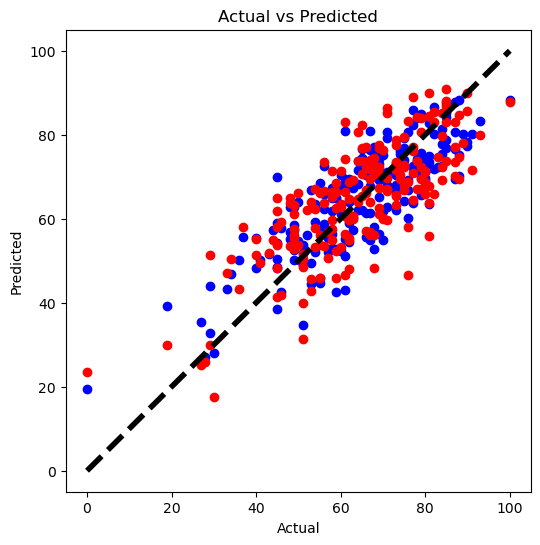

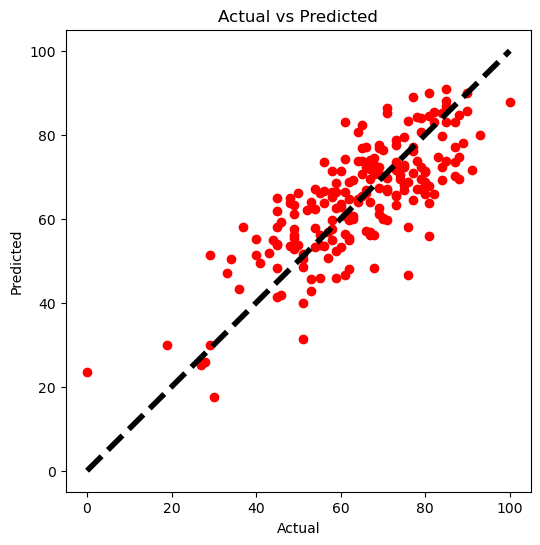

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/Dell/Documents/Student Project/student-result-predictor/StudentsPerformance.csv')

df = pd.DataFrame(data)
# columns_to_drop = ['lunch', 'race/ethnicity']
# df = df.drop(columns=columns_to_drop, axis=1)

# Prepare the data
X = pd.concat([data[['writing score', 'reading score']], pd.get_dummies(data['parental level of education'])], axis=1) # Assuming 'result_column_name' is the column to predict
y = df['math score']

# RIDGE Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RIDGE Train the Ridge regression model
model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
model.fit(X_train, y_train)

# RIDGE Make predictions
y_pred = model.predict(X_test)

# RIDGE Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Error: {mse}')


# TREE Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TREE Train the Random Forest Regression model
tree_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
tree_model.fit(X_train, y_train)

# TREE Make predictions
tree_y_pred = tree_model.predict(X_test)

# TREE Evaluate the model
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)
print(f'Root Mean Squared Error: {tree_rmse}')
print(f'Mean Squared Error: {tree_mse}')


# Plot graph
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.scatter(y_test, tree_y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
